In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
import warnings;
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
import tushare as ts

In [3]:
data = ts.get_k_data('hs300',start='2010-01-01',end='2014-06-30')[['date','close']]

In [4]:
data.rename(columns={'close':'price'},inplace=True)

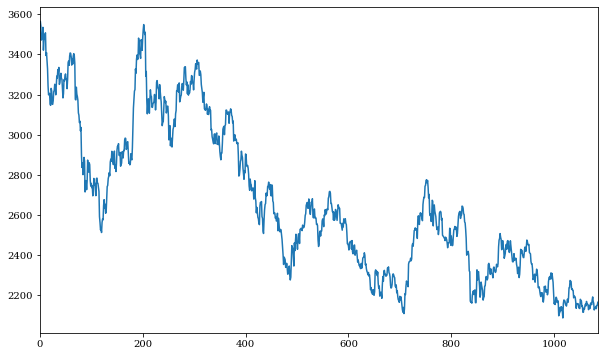

In [5]:
data['price'].plot(figsize=(10,6))

### 策略开发思路

In [6]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

In [7]:
SMA = 50

In [8]:
data['SMA'] = data['price'].rolling(SMA).mean()

In [9]:
threshold = 250

In [10]:
data['distance'] = data['price'] - data['SMA']

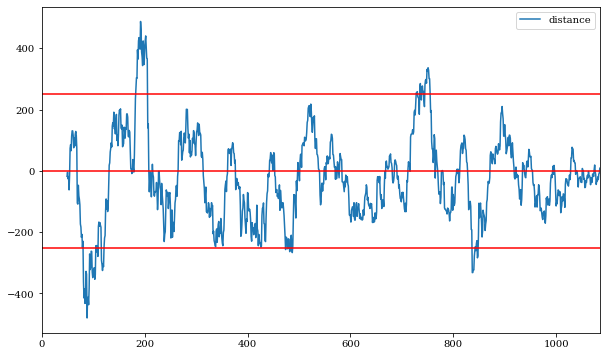

In [11]:
data['distance'].plot(figsize=(10,6),legend=True)
plt.axhline(threshold,color='r')
plt.axhline(-threshold,color='r')
plt.axhline(0,color='r')

In [19]:
data['position'] = np.where(data['distance'] > threshold,-1,np.nan)

In [20]:
data['position'] = np.where(data['distance'] < -threshold,1,data['position'])

In [21]:
data['position'] = np.where(data['distance']*data['distance'] < 0,0,data['position'])

In [22]:
data['position'] = data['position'].ffill().fillna(0)

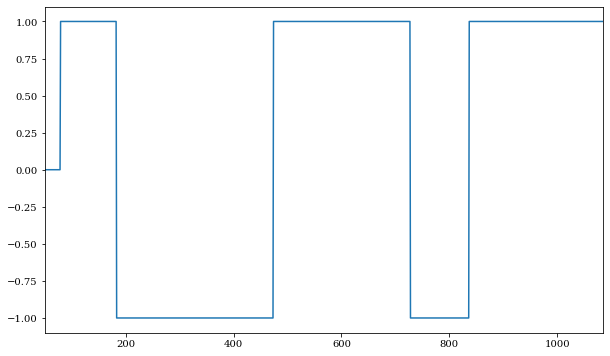

In [23]:
data['position'].iloc[SMA:].plot(ylim=[-1.1,1.1],figsize=(10,6))

In [17]:
data['strategy'] = data['position'].shift(1) * data['returns']

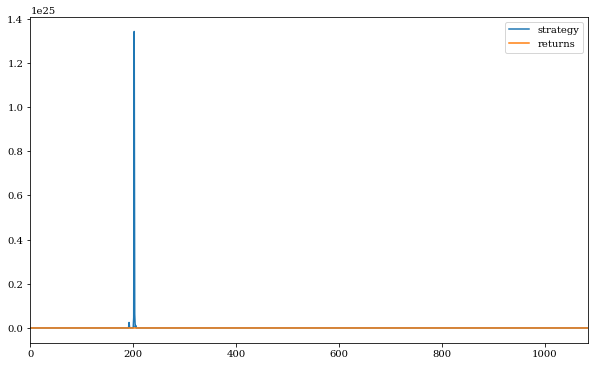

In [18]:
data[['strategy','returns']].cumsum().apply(np.exp).plot(figsize=(10,6))